<a href="https://colab.research.google.com/github/tlhhogi123/EDA-/blob/main/Project_1_level_1%20dataset%201%20%26%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Author

I am a passionate data enthusiast skilled in using Python for data analysis and visualization.I specialize in extracting meaningful insights from complex datasets to support informed decision-making. To explore more of my work and projects, visit my GitHub profile at tlhhogi123/tlhogi.

# **Project 1 Level 1 : Exploratory Data Analysis on Retail Sales Data.**

About Dataset 1

Welcome to the Retail Sales and Customer Demographics Dataset! This synthetic dataset has been meticulously crafted to simulate a dynamic retail environment, providing an ideal playground for those eager to sharpen their data analysis skills through exploratory data analysis (EDA). With a focus on retail sales and customer characteristics, this dataset invites you to unravel intricate patterns, draw insights, and gain a deeper understanding of customer behavior.

# **1. Data Loading and Cleaning**

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [143]:
# Load dataset
data = pd.read_csv('retail_sales_dataset.csv')

In [144]:
# Preview the dataset
print("Dataset Head:\n", data.head())


Dataset Head:
    Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [145]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [146]:
# Set 'Date' as the index
data.set_index('Date', inplace=True)


In [147]:
# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 Transaction ID      0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [148]:
# Fill missing values if needed (forward fill as an example)
data.fillna(method='ffill', inplace=True)

# **2. Descriptive statistics**

In [149]:
# Calculate descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


# **3. Time Series Analysis**

In [150]:
# Group by month time series
monthly_sales = data.resample('M').sum()
# Add a month column
monthly_sales['Month'] = monthly_sales.index.month

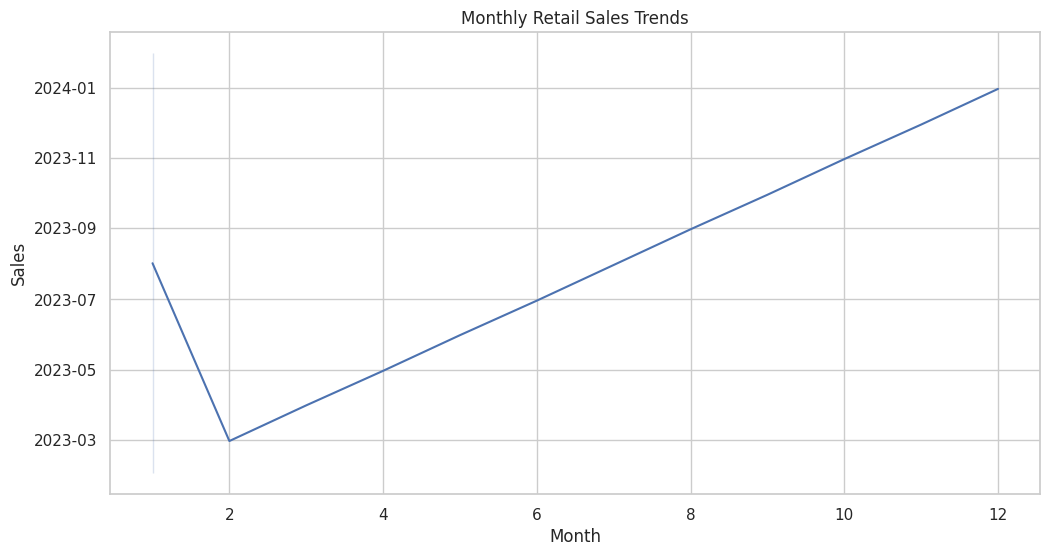

In [151]:
# Plot monthly trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Date', data=monthly_sales)
plt.title('Monthly Retail Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


In [152]:
# Descriptive Statistics of Monthly Sales
print("\nMonthly Sales Summary:\n", monthly_sales.describe())


Monthly Sales Summary:
        Transaction ID          Age    Quantity  Price per Unit  Total Amount  \
count       13.000000    13.000000   13.000000       13.000000     13.000000   
mean     38500.000000  3184.000000  193.384615    13837.692308  35076.923077   
std      13073.435037  1068.111808   62.432014     5018.988367  12694.394849   
min        861.000000    97.000000    4.000000      530.000000   1530.000000   
25%      34712.000000  3028.000000  194.000000    12715.000000  33870.000000   
50%      39202.000000  3230.000000  205.000000    14210.000000  35465.000000   
75%      47163.000000  3708.000000  214.000000    16255.000000  44060.000000   
max      53821.000000  4455.000000  259.000000    21255.000000  53150.000000   

           Month  
count  13.000000  
mean    6.076923  
std     3.774068  
min     1.000000  
25%     3.000000  
50%     6.000000  
75%     9.000000  
max    12.000000  


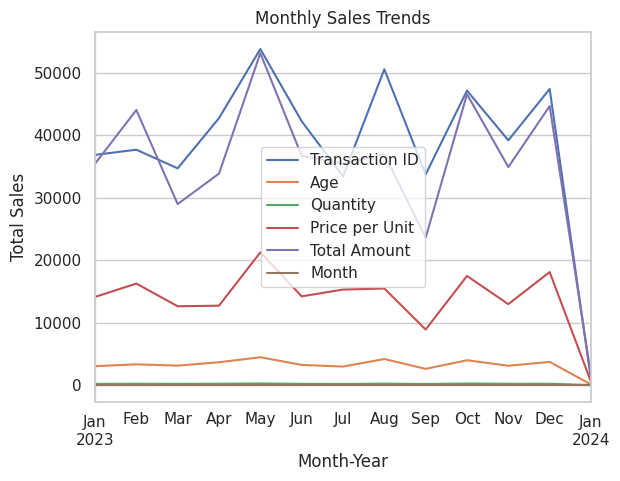

In [153]:
# Plot trends
monthly_sales.plot(kind='line', title='Monthly Sales Trends')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.show()


# **4. Visualization**

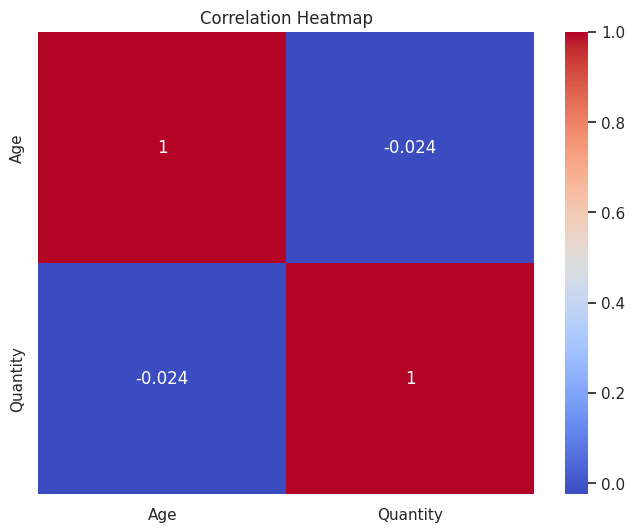

In [154]:
# Correlation heatmap (if there are other numeric variables)
if 'Quantity' in data.columns:
    correlation_matrix = data[['Age', 'Quantity']].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

# Observation Dataset 2

**Dataset 2 : Nutritional Fact in McDonald's Menu**

The project aims to develop a robust restaurant system renowned for providing consistently high-quality food prepared using uniform methods. By analyzing McDonald's menu nutrition data, we seek to understand the menu's nutritional profile and guide customers toward healthier food choices while retaining their favorite items.


In [155]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

In [156]:
# Load the dataset
file_path = "menu.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

    Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  Carbohydrates  \
0            

In [157]:
# Data Cleaning
# Check for missing values
print(df.isnull().sum())

# Handle missing values if any
df.fillna(0, inplace=True)

# Check for duplicate rows
print(f"Duplicates: {df.duplicated().sum()}")
df = df.drop_duplicates()

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns)

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64
Duplicates: 0
Index(['category', 'item', 'serving_size', 'calories', 'calories_from_fat',
       'total_fat', 'total_fat_(%_daily_value)', 'saturat

category
Beverages             113.703704
Desserts              222.142857
Snacks & Sides        245.769231
Salads                270.000000
Coffee & Tea          283.894737
Beef & Pork           494.000000
Breakfast             526.666667
Smoothies & Shakes    531.428571
Chicken & Fish        552.962963
Name: calories, dtype: float64


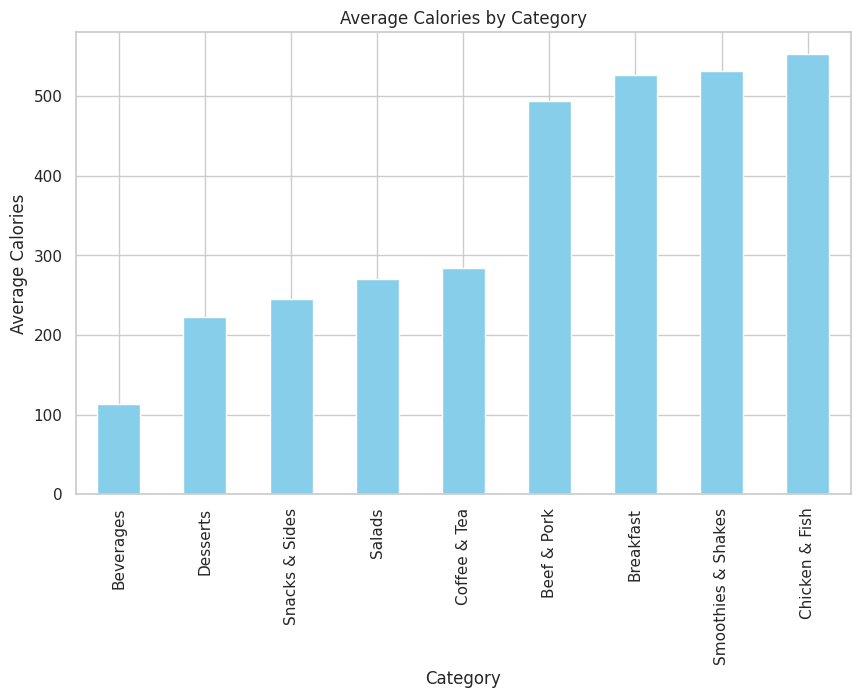

In [158]:
# Data exploration and statistical Analysis
# Group by category and calculate average calories
avg_calories = df.groupby('category')['calories'].mean().sort_values()
print(avg_calories)

# Visualization
avg_calories.plot(kind='bar', figsize=(10, 6), color='skyblue', title='Average Calories by Category')
plt.xlabel('Category')
plt.ylabel('Average Calories')
plt.show()

In [159]:
# Caloric contribution of beverages
# Filter beverages
beverages = df[df['category'].str.contains('Beverage', case=False)]

# Percentage of calories from beverages
beverage_calories = beverages['calories'].sum()
total_calories = df['calories'].sum()
beverage_percentage = (beverage_calories / total_calories) * 100
print(f"Beverages contribute {beverage_percentage:.2f}% of total caloric intake.")


Beverages contribute 3.21% of total caloric intake.


In [160]:
# Daily nutritional requirements
daily_needs = {'calories': 2000, 'fat': 70, 'carbs': 300, 'protein': 50}

# Optimization
from scipy.optimize import linprog

# Coefficients (calories)
c = df['calories']

# Nutritional constraints
A = [
    -df['calories'],  # Calories >= 2000
    -df['protein']    # Protein >= 50g
]
b = [-daily_needs['calories'], -daily_needs['fat'], -daily_needs['carbs'], -daily_needs['protein']]

# Bounds (items cannot be negative)
bounds = [(0, None) for _ in range(len(df))]

# Solve the optimization problem

print(df)


               category                                               item  \
0             Breakfast                                       Egg McMuffin   
1             Breakfast                                  Egg White Delight   
2             Breakfast                                   Sausage McMuffin   
3             Breakfast                          Sausage McMuffin with Egg   
4             Breakfast                   Sausage McMuffin with Egg Whites   
..                  ...                                                ...   
255  Smoothies & Shakes                 McFlurry with Oreo Cookies (Small)   
256  Smoothies & Shakes                McFlurry with Oreo Cookies (Medium)   
257  Smoothies & Shakes                 McFlurry with Oreo Cookies (Snack)   
258  Smoothies & Shakes  McFlurry with Reese's Peanut Butter Cups (Medium)   
259  Smoothies & Shakes   McFlurry with Reese's Peanut Butter Cups (Snack)   

        serving_size  calories  calories_from_fat  total_fat  \

# **Conclusion**

This project combines data cleaning, exploration, statistical analysis, and optimization to provide actionable insights into EDA in Retail Sales Trends and McDonald's menu nutritional facts. Let me know if you'd like to explore or refine any specific section